In [1]:
import numpy as np
import scanpy as sc
import os
import anndata
import matplotlib.pyplot as plt
import scipy
from scipy.stats import wilcoxon
from matplotlib.pyplot import figure
import copy
import json
import gseapy
from gseapy import enrichr

In [2]:
hvalldata = anndata.read_h5ad('gtdata.h5ad')
hvalldata

AnnData object with n_obs × n_vars = 74372 × 6013
    obs: 'celltype', 'sample_ids', 'ft'
    var: 'gene_symbols', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    obsm: 'X_pca', 'X_umap', 'X_umap_pkg'

In [3]:
pnum = 8
rnd = int(pnum/2)
reprefile = 'active_training_rec/eer_representatives_'+str(rnd)+'.txt'    #6000genebackup/
#'eer_representatives_'+str(rnd)+'.txt' #'init_representatives_4.txt'    #'uncertainty2_representatives.txt'
clusterfile = 'active_training_rec/eer_cluster_labels_'+str(rnd)+'.txt'
#'eer_cluster_labels_'+str(rnd)+'.txt' #'init_cluster_labels_4.txt'      #'uncertainty2_cluster_labels.txt'

f= open(reprefile,'r')
lines=f.readlines()
representatives=[]
for l in lines:
    representatives.append(int(l.strip().split()[0]))
f.close()

f= open(clusterfile,'r')
cluster_labels=[]
lines=f.readlines()
for l in lines:
    cluster_labels.append(int(l.strip().split()[0]))
f.close()

In [4]:
pnum = 4
rnd = int(pnum/2)
reprefile = 'active_training_rec/eer_representatives_'+str(rnd)+'.txt'    #6000genebackup/
#'eer_representatives_'+str(rnd)+'.txt' #'init_representatives_4.txt'    #'uncertainty2_representatives.txt'
clusterfile = 'active_training_rec/eer_cluster_labels_'+str(rnd)+'.txt'
#'eer_cluster_labels_'+str(rnd)+'.txt' #'init_cluster_labels_4.txt'      #'uncertainty2_cluster_labels.txt'

f= open(reprefile,'r')
lines=f.readlines()
representatives4=[]
for l in lines:
    representatives4.append(int(l.strip().split()[0]))
f.close()

f= open(clusterfile,'r')
cluster_labels4=[]
lines=f.readlines()
for l in lines:
    cluster_labels4.append(int(l.strip().split()[0]))
f.close()

In [211]:
reprefile = 'active_training_rec/init_representatives_2.txt'    #6000genebackup/
#'eer_representatives_'+str(rnd)+'.txt' #'init_representatives_4.txt'    #'uncertainty2_representatives.txt'
clusterfile = 'active_training_rec/init_cluster_labels_2.txt'
#'eer_cluster_labels_'+str(rnd)+'.txt' #'init_cluster_labels_4.txt'      #'uncertainty2_cluster_labels.txt'

f= open(reprefile,'r')
lines=f.readlines()
representatives2=[]
for l in lines:
    representatives2.append(int(l.strip().split()[0]))
f.close()

f= open(clusterfile,'r')
cluster_labels2=[]
lines=f.readlines()
for l in lines:
    cluster_labels2.append(int(l.strip().split()[0]))
f.close()

In [212]:
f=open('pids.txt')
lines=f.readlines()
pids=[]
for l in lines:
    pids.append(l.strip())
f.close()

In [7]:
## load 
import timeit 
t_start = timeit.default_timer()

celltypes = []
gts=[]
semis=[]

for i in range(len(pids)):
    pid = pids[i]
    adata = hvalldata[np.array(hvalldata.obs['sample_ids'])==pid,:]
    celltype = adata.obs['celltype']
    x = np.array(adata.X)
    #x = np.log1p(x)-
    gts.append(x)
    
    repre = representatives[cluster_labels[i]]
    reprepid = pids[repre]
    if reprepid==pid:
        semis.append(x)
    else:
        xsem = np.load('semidata/fast'+ reprepid+'_to_'+pid+'.npy') # 6000genebackup/
        xsem = xsem*(xsem>10)
        semis.append(np.log(xsem+1))
        
    celltypes.append(celltype)
    print(i,end=', ')

t_end = timeit.default_timer()
print()
print(str(t_end-t_start),'seconds')

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 
6.039978975022677 seconds


In [8]:
celltypes4 = []
gts4=[]
semis4=[]

for i in range(len(pids)):
    pid = pids[i]
    adata = hvalldata[np.array(hvalldata.obs['sample_ids'])==pid,:]
    celltype = adata.obs['celltype']
    x = np.array(adata.X)
    #x = np.log1p(x)-
    gts4.append(x)
    
    repre = representatives4[cluster_labels4[i]]
    reprepid = pids[repre]
    if reprepid==pid:
        semis4.append(x)
    else:
        xsem = np.load('semidata/fast'+ reprepid+'_to_'+pid+'.npy') # 6000genebackup/
        xsem = xsem*(xsem>10)
        semis4.append(np.log(xsem+1))
        
    celltypes4.append(celltype)
    print(i,end=', ')


0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 

In [213]:
celltypes2 = []

semis2=[]

for i in range(len(pids)):
    pid = pids[i]
    adata = hvalldata[np.array(hvalldata.obs['sample_ids'])==pid,:]
    celltype = adata.obs['celltype']
    x = np.array(adata.X)

    
    repre = representatives2[cluster_labels2[i]]
    reprepid = pids[repre]
    if reprepid==pid:
        semis2.append(x)
    else:
        xsem = np.load('semidata/fast'+ reprepid+'_to_'+pid+'.npy') # 6000genebackup/
        xsem = xsem*(xsem>10)
        semis2.append(np.log(xsem+1))
        
    celltypes2.append(celltype)
    print(i,end=', ')

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 

In [10]:
for i in range(25):
    if gts[i].max()>10:
        print('gts')
    if semis[i].max()>10:
        print('semis')
    if gts4[i].max()>10:
        print('gts4')
    if semis4[i].max()>10:
        print('semis4')

In [11]:
hvmask = np.load('hvmask.npy')
setmask = np.load('hvset.npy')

In [12]:
def deconv(svc,xtest):
    ytest = svc.predict((xtest))
    return list(ytest)

In [13]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
#neigh = NearestNeighbors(n_neighbors=1)
#neigh.fit(samples)
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
#RandomForestClassifier(max_depth=2, random_state=0)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

st = timeit.default_timer()
linearSVM = MLPClassifier()
#linearSVM.fit(((x_train-20)*(x_train>20)), y_train)
xtrain=[]
ytrain=[]
for i in (representatives):
    xtrain.append(gts[i])
    ytrain.append((celltypes[i]).astype('str'))
xtrain = np.concatenate(xtrain,axis=0)
ytrain = np.concatenate(ytrain,axis=0)
linearSVM.fit((xtrain),ytrain)
ed = timeit.default_timer()
print(str(ed-st))

372.5364104700275


In [299]:
st = timeit.default_timer()
linearSVM4 = MLPClassifier(hidden_layer_sizes=(200,))
#linearSVM.fit(((x_train-20)*(x_train>20)), y_train)
xtrain4=[]
ytrain4=[]
for i in (representatives4):
    xtrain4.append(gts4[i])
    ytrain4.append((celltypes4[i]).astype('str'))
xtrain4 = np.concatenate(xtrain4,axis=0)
ytrain4 = np.concatenate(ytrain4,axis=0)
linearSVM4.fit((xtrain4),ytrain4)
ed = timeit.default_timer()
print(str(ed-st))

262.0022177849896


In [284]:
st = timeit.default_timer()
linearSVM2 = MLPClassifier(hidden_layer_sizes=(200,))
#linearSVM.fit(((x_train-20)*(x_train>20)), y_train)
xtrain2=[]
ytrain2=[]
for i in (representatives2):
    xtrain2.append(gts[i])
    ytrain2.append((celltypes2[i]).astype('str'))
xtrain2 = np.concatenate(xtrain2,axis=0)
ytrain2 = np.concatenate(ytrain2,axis=0)
linearSVM2.fit((xtrain2),ytrain2)
ed = timeit.default_timer()
print(str(ed-st))

116.28406938898843


In [15]:
pcelltypes = []
for i in range(len(pids)):
    if i in representatives:
        pcelltypes.append(celltypes[i])
        continue
    pcelltypes.append(list(deconv(linearSVM,semis[i])))


In [300]:
pcelltypes4 = []
for i in range(len(pids)):
    if i in representatives4:
        pcelltypes4.append(celltypes4[i])
        continue
    pcelltypes4.append(list(deconv(linearSVM4,semis4[i])))

In [285]:
pcelltypes2 = []
for i in range(len(pids)):
    if i in representatives2:
        pcelltypes2.append(celltypes2[i])
        continue
    pcelltypes2.append(list(deconv(linearSVM2,semis2[i])))

In [17]:
totaltypes = np.array(['1','2','3','4','5','6','7','8','9','10','11'])

In [228]:
def prop(gttypes ,semitypes, totaltypes):
    pgt = np.zeros(totaltypes.shape)
    psemi = np.zeros(totaltypes.shape)
    for i in range(len(totaltypes)):
        pgt[i] += (np.array(gttypes) == totaltypes[i]).sum()
        psemi[i] += (np.array(semitypes) == totaltypes[i]).sum()  ## celltypes2
    numgt=pgt
    numsemi=psemi
    pgt = pgt/pgt.sum()
    psemi = psemi/psemi.sum()
    pcor,pval = scipy.stats.pearsonr(pgt,psemi)
    return pcor,pval,pgt,psemi,numgt,numsemi

In [229]:
def RMSE(p1,p2):
    p1 = np.array(p1)
    p2 = np.array(p2)
    mse = ((p1-p2)**2).mean()
    rmse = mse**0.5
    return rmse

In [20]:
pcors = []
pgts=[]
psemis=[]
numgts = []
numsemis = []
prmses = []
for i in range(len(pids)):
    if i in representatives:
        pcors.append(1)
        prmses.append(0)
        continue
    pcor, pval, pgt, psemi, numgt, numsemi = prop(np.array(celltypes[i]).astype('str'),np.array(pcelltypes[i]).astype('str'),totaltypes)
    pcors.append(pcor)
    pgts.append(pgt)
    psemis.append(psemi)
    numgts.append(numgt.astype('float'))
    numsemis.append(numsemi.astype('float'))
    prmses.append(RMSE(pgt,psemi))

In [301]:
pcors4 = []
pgts4=[]
psemis4=[]
numgts4 = []
numsemis4 = []
prmses4 = []
for i in range(len(pids)):
    if i in representatives4:
        pcors4.append(1)
        prmses4.append(0)
        continue
    pcor, pval, pgt, psemi, numgt, numsemi = prop(np.array(celltypes4[i]).astype('str'),np.array(pcelltypes4[i]).astype('str'),totaltypes)
    pcors4.append(pcor)
    pgts4.append(pgt)
    psemis4.append(psemi)
    numgts4.append(numgt.astype('float'))
    numsemis4.append(numsemi.astype('float'))
    prmses4.append(RMSE(pgt,psemi))

In [286]:
pcors2 = []
pgts2=[]
psemis2=[]
numgts2 = []
numsemis2 = []
prmses2 = []
for i in range(len(pids)):
    if i in representatives2:
        pcors2.append(1)
        prmses2.append(0)
        continue
    pcor, pval, pgt, psemi, numgt, numsemi = prop(np.array(celltypes2[i]).astype('str'),np.array(pcelltypes2[i]).astype('str'),totaltypes)
    pcors2.append(pcor)
    pgts2.append(pgt)
    psemis2.append(psemi)
    numgts2.append(numgt.astype('float'))
    numsemis2.append(numsemi.astype('float'))
    prmses2.append(RMSE(pgt,psemi))

In [208]:
### naive 
naivecors = []
naivermse = []
for i in range(len(pids)):
    if i in representatives:
        naivecors.append(1)
        naivermse.append(0)
        continue
    rep = representatives[cluster_labels[i]]
    pcor, pval, pgt, psemi, numgt, numsemi = prop(celltypes[i],celltypes[rep],totaltypes)
    naivecors.append(pcor)
    naivermse.append(RMSE(pgt,psemi))

In [302]:
### naive 4
naivecors4 = []
naivermse4 = []
for i in range(len(pids)):
    if i in representatives4:
        naivecors4.append(1)
        naivermse4.append(0)
        continue
    rep = representatives4[cluster_labels4[i]]
    pcor, pval, pgt, psemi, numgt, numsemi = prop(celltypes4[i],celltypes4[rep],totaltypes)
    naivecors4.append(pcor)
    naivermse4.append(RMSE(pgt,psemi))

In [287]:
naivecors2 = []
naivermse2 = []
for i in range(len(pids)):
    if i in representatives2:
        naivecors2.append(1)
        naivermse2.append(0)
        continue
    rep = representatives2[cluster_labels2[i]]
    pcor, pval, pgt, psemi, numgt, numsemi = prop(celltypes2[i],celltypes2[rep],totaltypes)
    naivecors2.append(pcor)
    naivermse2.append(RMSE(pgt,psemi))

#### extract single-cell reference and bulk data for other deconv tools

In [219]:
## get single-cell reference

# get expression matrix
repxs = []
for i in representatives2:
    repx = ((hvalldata[hvalldata.obs['sample_ids'] == pids[i]].X))
    repx = np.exp(repx)-1
    repxs.append(repx)
repxs = np.concatenate(repxs,axis=0)
repxs = np.array(repxs)

In [220]:
# get labels
reflabels = []
for i in representatives2:
    repdata = hvalldata[hvalldata.obs['sample_ids'] == pids[i]]
    rlbs = repdata.obs['celltype']
    reflabels.append(list(rlbs))
reflabels = np.concatenate(reflabels,axis=0)

# get genes
genelist = list(hvalldata.var.index)

In [221]:
f=open('hvrefipsc2.txt','w')

hvrepxs = np.array(repxs)#[:,hvmask]
f.write('GeneSymbol')
for i in range(len(reflabels)):
    f.write('\t'+str(reflabels[i]))
f.write('\n')
hvgenelist = np.array(genelist)#[hvmask]
for i in range(len(hvgenelist)):
    f.write(hvgenelist[i])
    for j in range(len(reflabels)):
        f.write('\t'+str(hvrepxs[j,i]))
    f.write('\n')

f.close()

In [222]:
f=open('hvreftape2.txt','w')

hvrepxs = np.array(repxs)
f.write('GeneSymbol')
hvgenelist = np.array(genelist)
for i in range(len(hvgenelist)):
    f.write('\t'+str(hvgenelist[i]))
f.write('\n')

for i in range(len(reflabels)):
    f.write(reflabels[i])
    for j in range(len(hvgenelist)): 
        f.write('\t'+str(hvrepxs[i,j]))
    f.write('\n')

f.close()

In [175]:
len(reflabels)

11078

In [176]:
hvrepxs.shape

(11078, 6013)

In [177]:
f=open('hvbulktape2.txt','w')
f.write('GeneSymbol')
for i in range(len(hvgenelist)):
    f.write('\t'+hvgenelist[i])
f.write('\n')
for i in range(hvbulkdata.X.shape[0]):
    f.write(pids[i])
    for j in range(len(hvgenelist)):
        f.write('\t' + str(hvbulkdata.X[i,j]))
    f.write('\n')

f.close()

In [236]:
#alldata = anndata.read_h5ad('gtdata.h5ad')

pidlist = []
for i in representatives2:
    repdata = alldata[alldata.obs['sample_ids'] == pids[i]]
    pidlist = pidlist + list(repdata.obs['sample_ids'])
    
f=open('ref_pids.txt','w')
for i in pidlist:
    f.write(i+'\n')
f.close()

In [179]:
bulkdata = anndata.read_h5ad('bulkdata.h5ad')
bulkdata

AnnData object with n_obs × n_vars = 25 × 17156
    obs: 'pids'
    var: 'gene_symbols'

In [180]:
hvbulkdata = bulkdata[:,hvmask]
hvbulkdata.X.max()

ArrayView(180.63872, dtype=float32)

In [181]:

hvgenes = np.array(hvbulkdata.var.index)
f=open('hvbulk.txt','w')
f.write('Gene')
for i in range(len(pids)):
    f.write('\t'+str(pids[i]))
f.write('\n')
for i in range(len(hvgenes)):
    f.write(hvgenes[i])
    for j in range(len(pids)):
        f.write('\t'+str(hvbulkdata.X[j,i]))
    f.write('\n')

f.close()

#### end of extracting data

### start loading results and comparison

In [182]:
#tapedf.to_numpy()[:,1:]

In [303]:
import pandas as pd
tapedf = pd.read_csv('tageresult4.csv')
ptape = []
for i in range(len(pids)):
    if i in representatives:
        ptape.append(1.0)
        continue
    pid=pids[i]
    #pid = pids[i].replace('-','.')
    bprp = np.array((tapedf.to_numpy()[:,1:])[i])
    bprp = np.array((list(bprp)))
    #bprp = bprp[ [0,1,2,3,4,5,6,7,9,10,8]]
    ptape.append(bprp)

In [304]:
len(ptape)

25

In [305]:
totaltypes

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'],
      dtype='<U2')

In [306]:
tapecors = []
tapermses = []

for i in range(len(pids)):
    if i in representatives:
        tapecors.append(1)
        tapermses.append(0)
        continue
    pid = pids[i]
    gttypes = list(hvalldata[hvalldata.obs['sample_ids']==pid].obs['celltype'])
    pgt = np.zeros(totaltypes.shape)
    for j in range(len(totaltypes)):
        pgt[j] += (np.array(gttypes) == totaltypes[j]).sum()
    numgt=pgt
    pgt = pgt/pgt.sum()
    
    pcor,pval = scipy.stats.pearsonr(pgt,ptape[i])
    tapecors.append(pcor)
    tapermses.append(RMSE(pgt,ptape[i]))

In [307]:
sdf = pd.read_csv('scadenresult4.csv')
pscaden = []
for i in range(len(pids)):
    if i in representatives:
        pscaden.append(1.0)
        continue
    pid=pids[i]
    #pid = pids[i].replace('-','.')
    bprp = np.array((sdf.to_numpy()[:,1:])[i])
    bprp = np.array((list(bprp)))
    #bprp = bprp[ [0,1,2,3,4,5,6,7,9,10,8]]
    pscaden.append(bprp)

In [308]:
scadencors = []
scadenrmses = []

for i in range(len(pids)):
    if i in representatives:
        scadencors.append(1)
        scadenrmses.append(0)
        continue
    pid = pids[i]
    gttypes = list(hvalldata[hvalldata.obs['sample_ids']==pid].obs['celltype'])
    pgt = np.zeros(totaltypes.shape)
    for j in range(len(totaltypes)):
        pgt[j] += (np.array(gttypes) == totaltypes[j]).sum()
    numgt=pgt
    pgt = pgt/pgt.sum()
    
    pcor,pval = scipy.stats.pearsonr(pgt,pscaden[i])
    scadencors.append(pcor)
    scadenrmses.append(RMSE(pgt,pscaden[i]))

In [310]:
## cibersortx

f = open('CIBERSORTx_ipsc4refs.txt','r')
lines = f.readlines()
f.close()

ciberprops = {}
for i in range(1,len(lines)):
    l=lines[i].split('\t')
    pid = l[0]
    prp = []
    for j in range(1,len(l)-3):
        prp.append(float(l[j]))
    ciberprops[pid] = prp
    

In [311]:
totaltypes

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'],
      dtype='<U2')

In [312]:
lines[0].split('\t')

['Mixture',
 '1',
 '3',
 '5',
 '2',
 '9',
 '7',
 '4',
 '8',
 '11',
 '6',
 '10',
 'P-value',
 'Correlation',
 'RMSE\n']

In [192]:
cibertype = np.array([1,3,5,2,9,7,4,8,11,6,10])

In [ ]:
cibertype = np.array([1,3,5,2,9,7,4,8,6,10])

In [313]:
cibercors = []
ciberrmses = []

cibersortorder = [0,3,1,6,2,8,5,7,4,9,10]
cibersortorder = [0,3,1,6,2,9,5,7,4,10,8]


for i in range(len(pids)):
    if i in representatives:
        cibercors.append(1)
        ciberrmses.append(0)
        continue
    pid = pids[i]
    
    gttypes = list(hvalldata[hvalldata.obs['sample_ids']==pid].obs['celltype'])
    
    pgt = np.zeros(totaltypes.shape)
    for j in range(len(totaltypes)):
        pgt[j] += (np.array(gttypes) == totaltypes[j]).sum()
    numgt=pgt
    pgt = pgt/pgt.sum()
    
    #pcibersort = np.array(list(np.array(ciberprops[pid])) + [0] )
    pcibersort = np.array(ciberprops[pid])
    pcibersort = np.array(list(pcibersort[cibersortorder]))
    pcor,pval = scipy.stats.pearsonr(pgt,pcibersort)
    cibercors.append(pcor)
    ciberrmses.append(RMSE(pgt,pcibersort))

In [314]:
np.mean(cibercors)

0.5855979694165029

In [315]:
for i in representatives:
    print(pids[i])

iMGL_D2_rep3_TPM
iMGL_T0901317_30nM_rep1_TPM
iMGL_D0_rep2_TPM
iMGL_DMSO_rep1_TPM
iMGL_D3_rep2_TPM
iMGL_GW3965_300nM_rep1_TPM
iMGL_D4_rep2_TPM
iMGL_T0901317_100nM_rep1_TPM


In [316]:
# bisque
import pandas as pd
df = pd.read_csv('bisque_est_1111_4refs.csv',sep=' ')
pbis = []
rmsebis =[ ]
for i in range(len(pids)):
    if i in representatives:
        pbis.append(1.0)
        continue
    pid=pids[i]
    #pid = pids[i].replace('-','.')
    bprp = np.array(df[pid])
    bprp = np.array((list(bprp)))
    #bprp = bprp[ [0,1,2,3,4,5,6,7,9,10,8]]
    pbis.append(bprp)

In [317]:
len(pcors)

25

In [318]:
biscor = []
bisrmse = []
for i in range(len(pids)):
    if i in representatives:
        biscor.append(1)
        bisrmse.append(0)
        continue
    pid = pids[i]
    gttypes = list(hvalldata[hvalldata.obs['sample_ids']==pid].obs['celltype'])
    pgt = np.zeros(totaltypes.shape)
    for j in range(len(totaltypes)):
        pgt[j] += (np.array(gttypes) == totaltypes[j]).sum()
    numgt=pgt
    pgt = pgt/pgt.sum()
    
    pcor,pval = scipy.stats.pearsonr(pgt,pbis[i])
    biscor.append(pcor)
    bisrmse.append(RMSE(pgt,pbis[i]))

In [354]:
## wilcox for p cor


pcor1b = pcors4
prmses1b = prmses4
naivecors1b = naivecors4
naivermse1b = naivermse4

res_semi_naive = wilcoxon(x=pcors, y=naivecors, alternative='greater')
print('between semi 8 and naive 8',res_semi_naive.statistic, res_semi_naive.pvalue)


res_semi_naive = wilcoxon(x=pcor1b, y=naivecors1b, alternative='greater')
print('between semi 1b and naive 1b',res_semi_naive.statistic, res_semi_naive.pvalue)


res_semi6_bisque = wilcoxon(x=pcor1b, y=biscor, alternative='greater')
print('between semi 1b and bisque',res_semi6_bisque.statistic, res_semi6_bisque.pvalue)


res_semi6_ciber = wilcoxon(x=pcor1b, y=cibercors, alternative='greater')
print('between semi 1b and ciber',res_semi6_ciber.statistic, res_semi6_ciber.pvalue)


res = wilcoxon(x=pcors2, y=tapecors, alternative='greater')
print('between semi 1b and tape',res.statistic, res.pvalue)

res = wilcoxon(x=pcors2, y=scadencors, alternative='greater')
print('between semi 1b and scaden',res.statistic, res.pvalue)



## between semi 28 and sesmi 4
#res_semi28_semi4 = wilcoxon(x=pcors, y=pcibercor, alternative='greater')
#print('between semi 28 and semi 4',res_semi28_semi4.statistic, res_semi28_semi4.pvalue)


between semi 8 and naive 8 76.0 0.5094417045583245
between semi 1b and naive 1b 170.0 0.02909313623992563
between semi 1b and bisque 137.0 0.22744442234454088
between semi 1b and ciber 221.0 0.00012273898571880915
between semi 1b and tape 217.0 0.008135457397187369
between semi 1b and scaden 179.0 0.10619635031717001


In [320]:
import mycolorpy

In [321]:
np.mean(pcors2)

0.7880374632883326

In [322]:
np.mean(naivecors2)

0.7729039339541227

In [323]:
import matplotlib
from mycolorpy import colorlist as mcp
#cmap = matplotlib.cm.get_cmap('Pastel2')
mcp.gen_color(cmap="Set3",n=6)

['#8dd3c7', '#bebada', '#80b1d3', '#fccde5', '#bc80bd', '#ffed6f']

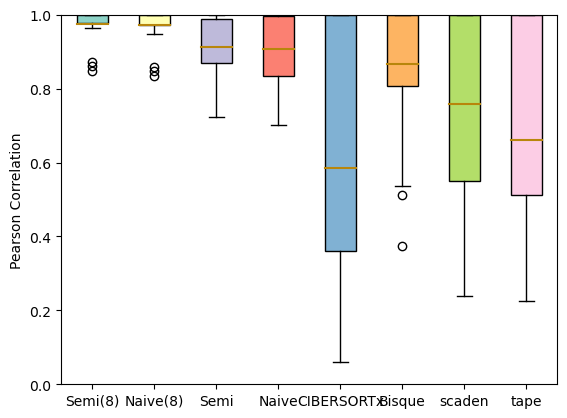

In [355]:
fig, ax = plt.subplots()

boxprops = dict(linestyle='-', linewidth=3, color='darkgoldenrod')
meanlineprops = dict(linestyle='-', linewidth=1.5, color='darkgoldenrod')

# Plot the boxplots
#boxplot = ax.boxplot([pcors, naivecors, pcors2, naivecors2, cibercors, biscor, tapecors,scadencors], patch_artist=True,showmeans = True, meanline=True)

boxplot = ax.boxplot([pcors, naivecors, pcors4, naivecors4, cibercors, biscor,scadencors,tapecors], meanline=True, showmeans=True,patch_artist=True, meanprops=meanlineprops)


# Define the colors for the boxes
box_colors = mcp.gen_color(cmap="Set3",n=6)

box_colors = ['lightblue', 'lightgreen', 'lightyellow', 'lightpink', 'lightgray']
set3 = plt.get_cmap('Set3')
box_colors = set3.colors

# Iterate over each box and set the facecolor
for box, color in zip(boxplot['boxes'], box_colors):
    box.set(facecolor=color)

for median in boxplot['medians']:
    median.set_color('none')  
    
    
# Add axis labels and title
#ax.set_xlabel('Method')
ax.set_ylabel('Pearson Correlation')
#ax.set_title('Deconvolution Performance Comparison')

# Add x-axis tick labels
ax.set_xticklabels(['Semi(8)', 'Naive(8)','Semi', 'Naive','CIBERSORTx','Bisque','scaden','tape'])
ax.set_ylim(0,1)
# Display the plot
plt.savefig('results/1111deconv_pcorr.pdf')
plt.show()


In [353]:
## wilcox for rmse 2



res_semi_naive = wilcoxon(x=prmses, y=naivermse, alternative='less')
print('between semi 8 and naive 8',res_semi_naive.statistic, res_semi_naive.pvalue)

res_semi_naive = wilcoxon(x=prmses1b, y=naivermse1b, alternative='less')
print('between semi 1b and naive 1b',res_semi_naive.statistic, res_semi_naive.pvalue)

res_semi6_bisque = wilcoxon(x=prmses1b, y=bisrmse, alternative='less')
print('between semi 1b and bisque2',res_semi6_bisque.statistic, res_semi6_bisque.pvalue)


res_semi6_ciber = wilcoxon(x=prmses1b, y=ciberrmses, alternative='less')
print('between semi 1b and ciber',res_semi6_ciber.statistic, res_semi6_ciber.pvalue)

res = wilcoxon(x=prmses1b, y=tapermses, alternative='less')
print('between semi 1b and tape',res.statistic, res.pvalue)

res = wilcoxon(x=prmses1b, y=scadenrmses, alternative='less')
print('between semi 1b and scaden',res.statistic, res.pvalue)



between semi 8 and naive 8 99.0 0.8565863353777812
between semi 1b and naive 1b 82.0 0.12213476648501465
between semi 1b and bisque2 100.0 0.29503190122886946
between semi 1b and ciber 20.0 0.0004511273172462427
between semi 1b and tape 23.0 0.000652034910446923
between semi 1b and scaden 48.0 0.009484455517414609


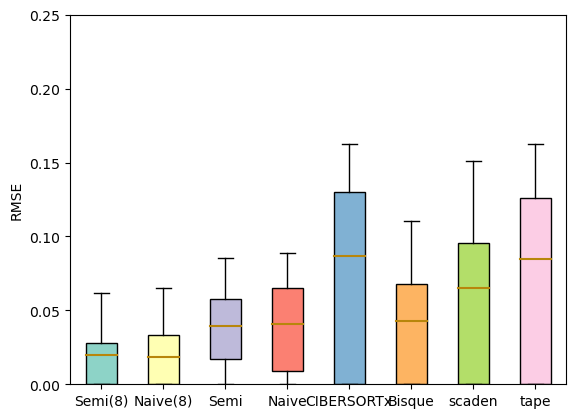

In [349]:
fig, ax = plt.subplots()

# Plot the boxplots
#boxplot = ax.boxplot([prmses, naivermse,prmses2, naivermse2,ciberrmses, bisrmse,tapermses,scadenrmses], patch_artist=True,showmeans = True, meanline=True)
boxplot = ax.boxplot([prmses, naivermse,prmses4, naivermse4,ciberrmses, bisrmse,scadenrmses,tapermses], meanline=True, showmeans=True,patch_artist=True, meanprops=meanlineprops)

for median in boxplot['medians']:
    median.set_color('none')  
    

# Define the colors for the boxes
'''box_colors = ['#a6cee3',
 '#1f78b4',
 '#b2df8a',
 '#fb9a99',
 '#e31a1c',
 '#fdbf6f',
 '#cab2d6',
 '#6a3d9a',
 '#ffff99',
 '#b15928']'''
#['lightblue', 'lightgreen', 'lightyellow', 'lightpink', 'lightgray']
set3 = plt.get_cmap('Set3')
box_colors = set3.colors
# Iterate over each box and set the facecolor
for box, color in zip(boxplot['boxes'], box_colors):
    box.set(facecolor=color)

# Add axis labels and title
#ax.set_xlabel('Method')
ax.set_ylabel('RMSE')
#ax.set_title('Deconvolution Performance Comparison')

# Add x-axis tick labels
#ax.set_xticklabels(['Semi', 'Naive','CIBERSORTx','Bisque'])
ax.set_xticklabels(['Semi(8)', 'Naive(8)','Semi', 'Naive','CIBERSORTx','Bisque','scaden','tape'])
ax.set_ylim(0,0.25)
# Display the plot
plt.savefig('results/1111deconv_rmse.pdf')
plt.show()